# Importamos librerias

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.git', 'column_2C_weka.csv', 'et_ml.ipynb']


# Tomamos nuestro dataframe (local, no trabajamos desde collab)
### Tambien cambiamos los tipos de datos a float para poder procesarlos con mayor facilidad

In [43]:
name= "column_2C_weka.csv"
df = pd.read_csv(name,sep=";")

paraConvertir = ['incidencia_pelvica', 'inclinacion_pelvica', ' angulo_lordosis_lumbar', 'pendiente_sacra', 'radio_pelvico', 'grado_espondilolistesis']

def ConvertirAFloat(df, columna):
    df[columna] = df[columna].str.replace(',', '.').astype(float)
    return df

for columna in paraConvertir:
    df = ConvertirAFloat(df, columna)

df.head(10)

,incidencia_pelvica,inclinacion_pelvica,angulo_lordosis_lumbar,pendiente_sacra,radio_pelvico,grado_espondilolistesis,clase
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Anormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Anormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Anormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Anormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Anormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Anormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Anormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Anormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Anormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Anormal


# 1. Analisis exploratorio de los datos (EDA)

## 1.1. Verificar que la columna Clase sólo tenga las categorías Normal y Anormal

In [32]:
df_clase = df[df['clase'].isin(['Anormal', 'Normal'])]
df_clase['clase'].value_counts()

clase
Anormal    210
Normal     100
Name: count, dtype: int64

<span style="color:lime">Podemos notar que entre las 2 clases existen 310 casos, los cuales 210 son anormales y 100 son normales</span>

## 1.2. Efectúe Análisis de Valores Perdidos (missing values) y corríjalos, si procede.
 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   incidencia_pelvica       310 non-null    object
 1   inclinacion_pelvica      310 non-null    object
 2    angulo_lordosis_lumbar  310 non-null    object
 3   pendiente_sacra          310 non-null    object
 4   radio_pelvico            310 non-null    object
 5   grado_espondilolistesis  310 non-null    object
 6   clase                    310 non-null    object
dtypes: object(7)
memory usage: 17.1+ KB


In [34]:
df.isnull().sum()

incidencia_pelvica         0
inclinacion_pelvica        0
 angulo_lordosis_lumbar    0
pendiente_sacra            0
radio_pelvico              0
grado_espondilolistesis    0
clase                      0
dtype: int64

<span style="color:lime">No existen valores perdidos (missing values) o nulos, por lo que no hay necesidad de corregir</span> 

## 1.3  Presente mediante un heatmat el estado de las columnas para verificar la corrección aplicada a los valores perdidos, si procede.

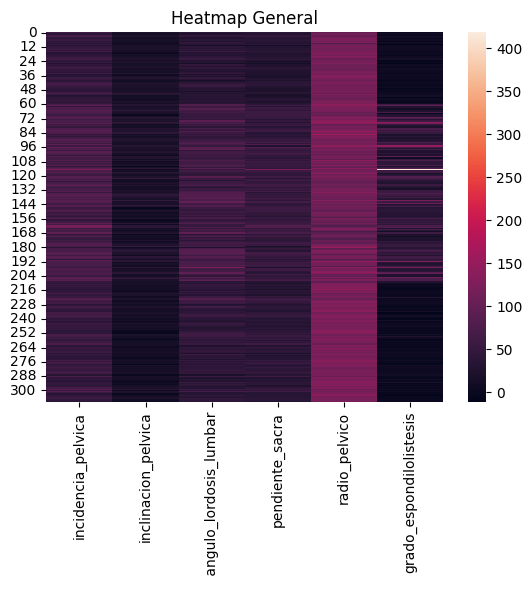

In [49]:
plt.title('Heatmap General')
sns.heatmap(df.drop('clase', axis=1))
plt.show()

TypeError: DataFrame.pivot() missing 1 required keyword-only argument: 'columns'

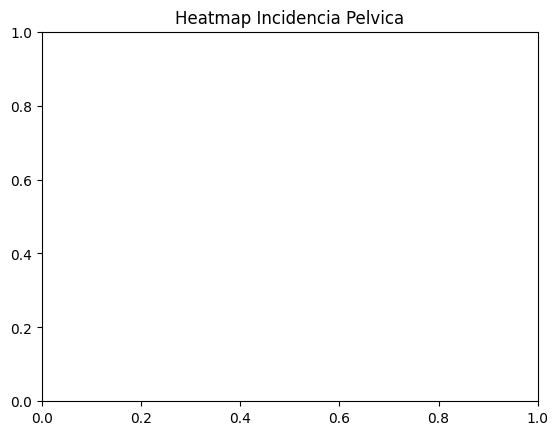

In [56]:
plt.title('Heatmap Incidencia Pelvica')
incidencia_pelvica = df.pivot(index='incidencia_pelvica', values='incidencia_pelvica')
sns.heatmap(incidencia_pelvica, cmap='coolwarm', annot=True)
plt.show()

<span style="color:lime"></span> 

# Estadisticas descriptivas del dataframe

In [ ]:
df.describe()

,incidencia_pelvica,inclinacion_pelvica,angulo_lordosis_lumbar,pendiente_sacra,radio_pelvico,grado_espondilolistesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


# Heatmap

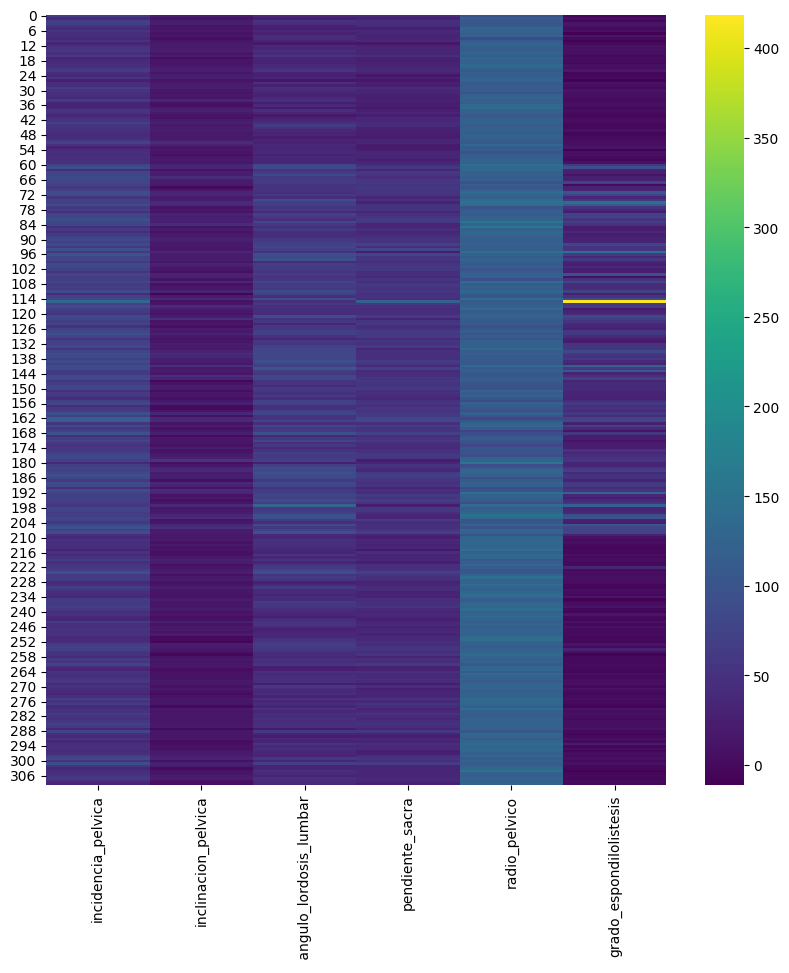

In [ ]:
# Heatmap del estado de las columnas usando todas las filas menos la de clase

plt.figure(figsize=(10, 10))
sns.heatmap(df.drop('clase', axis=1), cmap='viridis')
plt.show()


# Histogramas

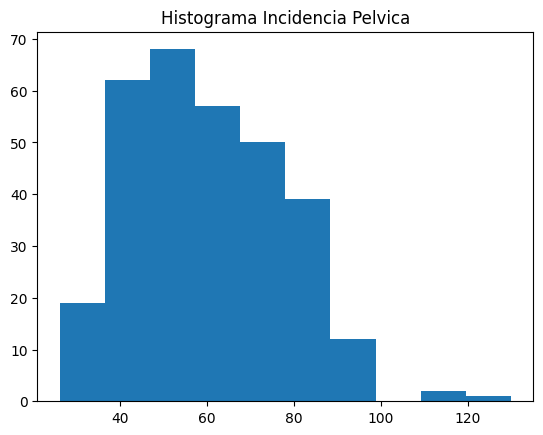

In [ ]:
plt.hist(df['incidencia_pelvica'])
plt.title('Histograma Incidencia Pelvica')
plt.show()

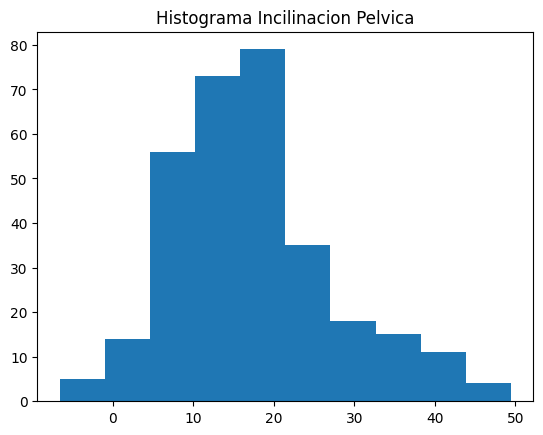

In [ ]:
plt.hist(df['inclinacion_pelvica'])
plt.title('Histograma Incilinacion Pelvica')
plt.show()

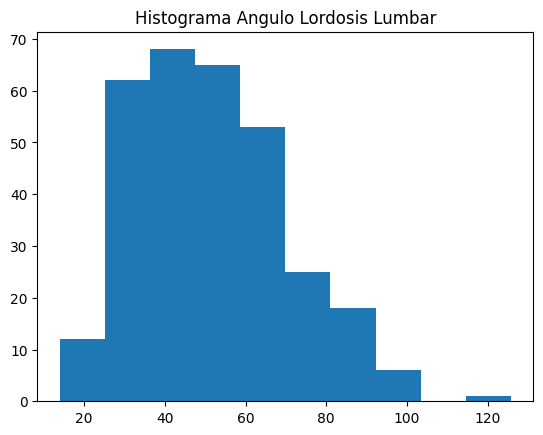

In [ ]:
plt.hist(df[' angulo_lordosis_lumbar'])
plt.title('Histograma Angulo Lordosis Lumbar')
plt.show()

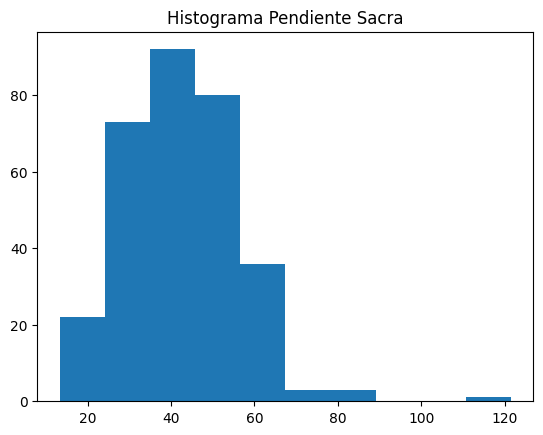

In [ ]:
plt.hist(df['pendiente_sacra'])
plt.title('Histograma Pendiente Sacra')
plt.show()

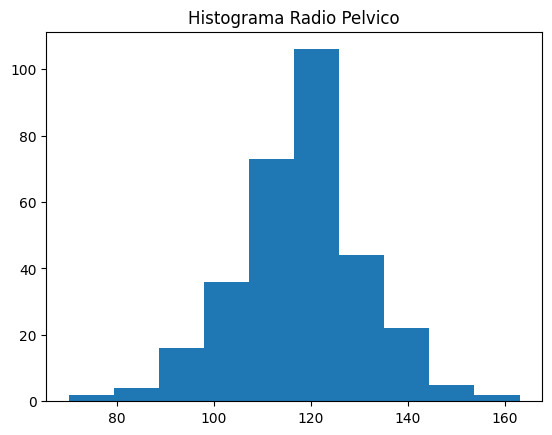

In [ ]:
plt.hist(df['radio_pelvico'])
plt.title('Histograma Radio Pelvico')
plt.show()

Text(0.5, 1.0, 'Histograma Grado Espondilolistesis')

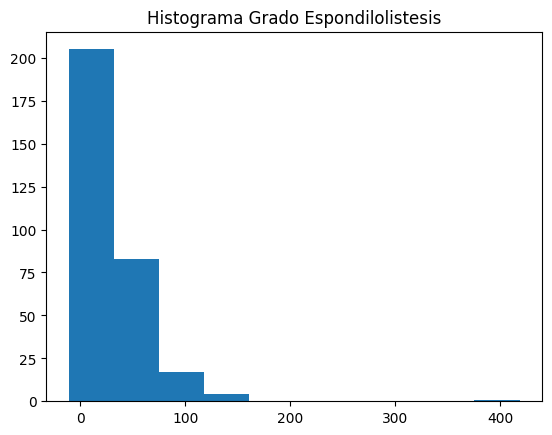

In [ ]:
plt.hist(df['grado_espondilolistesis'])
plt.title('Histograma Grado Espondilolistesis')

# 